# Project: Genomic Sequence Analysis

**In this project we are analyzing the genomic sequence of a bacteria named: Caulobacter Crescentus.**

Question we are trying to answer in this project are:
- Is it true that DNA breaks down into meaningful words of same length?
- If true, how long are the words?

We are trying to answer these questions by using **PCA** and **K-Means** algorithms.


In [1]:
#Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading the data

In [2]:
with open("ccrescentus.fa", "r") as f:
    genome = f.read()

In [33]:
genome

'>fragment of c.crescentus genome\ngccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaagg\ncgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgagggcgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcc\ncccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagata\nggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgc\ncctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggtcttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagct

In [6]:
print(genome)

>fragment of c.crescentus genome
gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaagg
cgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgagggcgaagggttggacgagaacttgctgcggtagctgccgtcatagccgacatagaactcgcccgtcttgcccaggaagtcgcccggaacattggcctcggcc
cccagggccacgctccacttcgaaacgcccggcagccgctgacccgagacgtcgcagttggcggggctgagcgcgccggccacgccggccgcgcgcggaacctgggttccggtcgccaccgtgccgcccgacagttccggcgggcagggcgcgtcgacaaagcgcacatacttggcgtcggtataggcggcgttcagata
ggtcgagaagcgggcgttcgggcgataggccgagtccagctccacgccttgggtgcgcaccttgccggcgttggccagatagccgcgcagcacgcccagctggccgttgctcaccgtggcctggtagttcttgatgtcgctgcggaacaccgcaaggttggccgtcagggtgcggtccagccactgggtcttcaggccgc
cctcgaagtgattgatgtcctcgggcttgatcgcgcctgcggcctcgatcggcttgcccgccgcatcggtcggcaggccgttctggttgatgccgccggtcttgaagctcttggcgtaggtggcgtaggccaggacgtcacggtccagctggtagcttgccga

In [4]:
len(genome)

306959

In [5]:
type(genome)

str

In [3]:
def loadSeq(pathToFile, filename):
    
    """ Automating the loading process """
    
    with open(pathToFile+filename, "r") as f:
        genome = f.read()
    
    genome = genome[32:].replace("\n", "") ## To remove all the newlines from the string
    
    return genome

In [4]:
PATH = "Path_to_the_File/"
FILE = "ccrescentus.fa"

In [5]:
text = loadSeq(PATH, FILE)

In [6]:
len(text)

305400

In [228]:
305400/300

1018.0

In [47]:
print(text[0])

g


In [40]:
len(genome[32:])

306927

In [43]:
len(genome[32:].replace('\n', ""))

305400

# Determining the optimal number of characters

In [7]:
a_string = text

split_strings = []
n  = 300
for index in range(0, len(a_string), n):
    split_strings.append(a_string[index : index + n])

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
## Function to split a text fragment into characters
def divide_n_char(text, n_char):
    word = list()
    for i in range(0, len(text), n_char):
        word.append(text[i:i+n_char])
    return word

In [9]:
list1 = divide_n_char(text[:300], 2)

In [10]:
from itertools import product

In [11]:
list_p = [''.join(p) for p in product('acgt', repeat=3)] 

In [12]:
list_p[0]

'aaa'

In [13]:
list1.count(list_p[3])

0

In [15]:
divide_n_char(split_strings[0], 3).count(list_p[3])

0

In [16]:
df = pd.DataFrame(columns = list_p)

In [17]:
df

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tcg,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt


In [19]:
for row, element in enumerate(split_strings):
    list_n_char = divide_n_char(element, 3)
    freq = list()
    
    for w in list_p:
        freq.append(list_n_char.count(w))
        
    df.loc[row] = freq

In [20]:
df.head()

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tcg,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt
0,0,3,1,0,0,1,0,0,0,2,...,0,0,1,0,2,0,0,0,1,1
1,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,3,0


In [21]:
def calcFreq(string_text, n_char, n_features):
    
    ### clipping the whole text into fragments of n_features
    a_string = string_text
    split_strings = []
    n  = n_features
    for index in range(0, len(a_string), n):
        split_strings.append(a_string[index : index + n])
        
    list_p = [''.join(p) for p in product('acgt', repeat=n_char)] 
    
    df = pd.DataFrame(columns = list_p)
    
    for row, element in enumerate(split_strings):
        list_n_char = divide_n_char(element, n_char)
        freq = list()

        for w in list_p:
            freq.append(list_n_char.count(w))

        df.loc[row] = freq
    
    return df

In [22]:
X2 = calcFreq(string_text=a_string, n_char=3, n_features=300)

In [23]:
X2

,aaa,aac,aag,aat,aca,acc,acg,act,aga,agc,...,tcg,tct,tga,tgc,tgg,tgt,tta,ttc,ttg,ttt
0,0,3,1,0,0,1,0,0,0,2,...,0,0,1,0,2,0,0,0,1,1
1,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1,0,2,1,1,2,1,0,1,4,...,2,1,1,1,2,1,0,1,7,0
1014,0,0,1,0,0,2,3,0,1,1,...,2,0,0,0,0,0,0,3,8,0
1015,0,0,2,0,1,1,1,0,1,1,...,1,1,1,2,2,0,0,2,2,2
1016,2,2,1,0,5,2,2,2,3,1,...,6,0,5,7,3,1,0,1,0,1


In [26]:
scaler = StandardScaler()

In [27]:
X2.shape

(1018, 64)

In [65]:
X4 = scaler.fit_transform(X2)

In [66]:
pca = PCA(n_components=2, svd_solver='full')

In [67]:
pca.fit(X4)

PCA(n_components=2, svd_solver='full')

In [68]:
X5 = pca.transform(X4)

In [69]:
print(pca.explained_variance_ratio_)

[0.16494983 0.15182276]


(-7.0, 6.0)

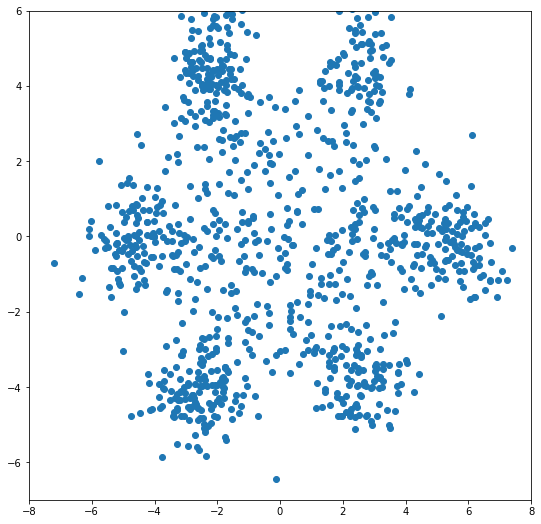

In [70]:
plt.figure(figsize=(9,9))
plt.scatter(X5[:, 0], X5[:, 1])
plt.xlim([-8, 8])
plt.ylim([-7, 6])

In [54]:
def pcaFreq(string_text, n_char, n_features):
    
    matrix = calcFreq(string_text, n_char, n_features)
    
    scaler = StandardScaler()
    scaler.fit(matrix)
    matrix = scaler.transform(matrix)
    
    pca = PCA(svd_solver='full')
    
    pca.fit(matrix)
    
    X = pca.transform(matrix)
    
    return X    

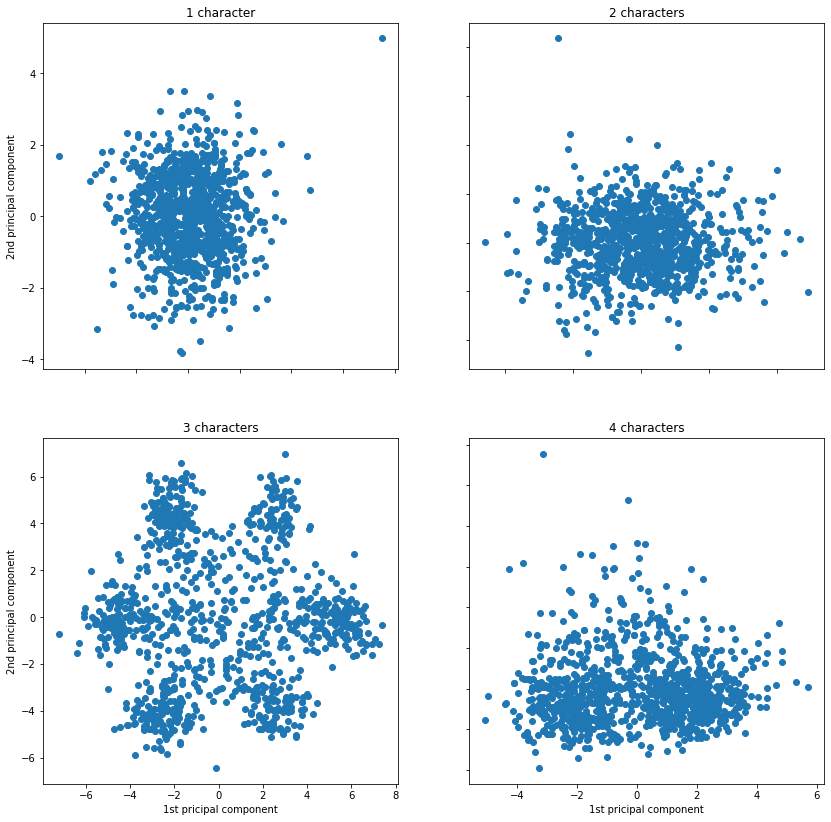

In [35]:
## These pcafreq in this cell have been used with n_components=2.

xx1 = pcaFreq(text, 1, 300)
xx2 = pcaFreq(text, 2, 300)
xx3 = pcaFreq(text, 3, 300)
xx4 = pcaFreq(text, 4, 300)

fig, axs = plt.subplots(2, 2, figsize=(14,14))

axs[0, 0].scatter(xx1[:, 0], xx1[:, 1])
axs[0, 0].set_title('1 character')

axs[0, 1].scatter(xx2[:, 0], xx2[:, 1])
axs[0, 1].set_title('2 characters')

axs[1, 0].scatter(xx3[:, 0], xx3[:, 1])
axs[1, 0].set_title('3 characters')

axs[1, 1].scatter(xx4[:, 0], xx4[:, 1])
axs[1, 1].set_title('4 characters')

for ax in axs.flat:
    ax.set(xlabel='1st pricipal component', ylabel='2nd principal component')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

With a character number of 1,2, and 4 the plottings of the first two components of PCA are just blob. However, with a character number of 3 we can see clearly a structure.
Let's continue with non-overlapping triplets.

In [372]:
xx3.shape

(1018, 2)

# Choosing the optimal number of clusters

In [57]:
X6 = scaler.fit_transform(X2)

In [58]:
pca = PCA(svd_solver='full')

In [59]:
pca.fit(X6)

PCA(svd_solver='full')

In [60]:
X7 = pca.transform(X6)

In [61]:
wcss = [] ## wcss: Within Clusters Sum of Squares

for i in range(2,21):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(X7)
    wcss.append(kmeans_pca.inertia_)

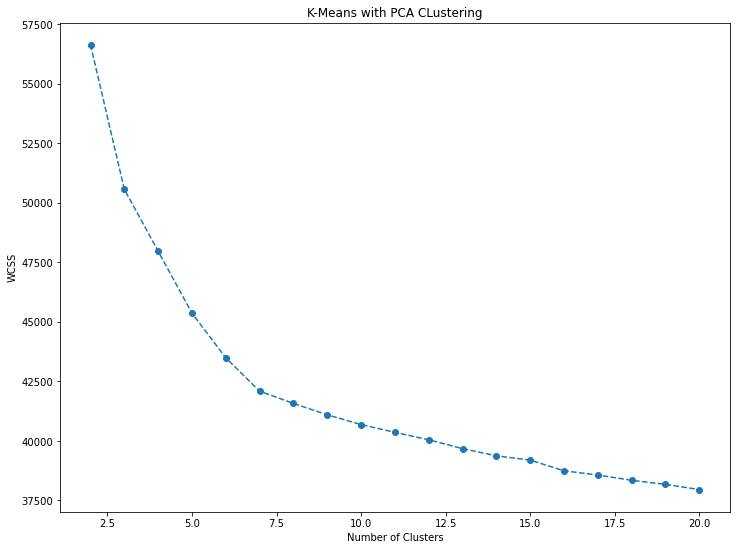

In [62]:
plt.figure(figsize=(12,9))
plt.plot(range(2,21), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means with PCA CLustering")
plt.show()

In [43]:
from sklearn.metrics import silhouette_score

In [63]:
clusters_range = range(2,21)
results = []

for c in clusters_range:
    cluster = KMeans(init="k-means++", n_clusters = c, n_init=100, random_state=42)
    cluster_labels = cluster.fit_predict(X7)
    silhouette_avg = silhouette_score(X7, cluster_labels)
    results.append([c, silhouette_avg])

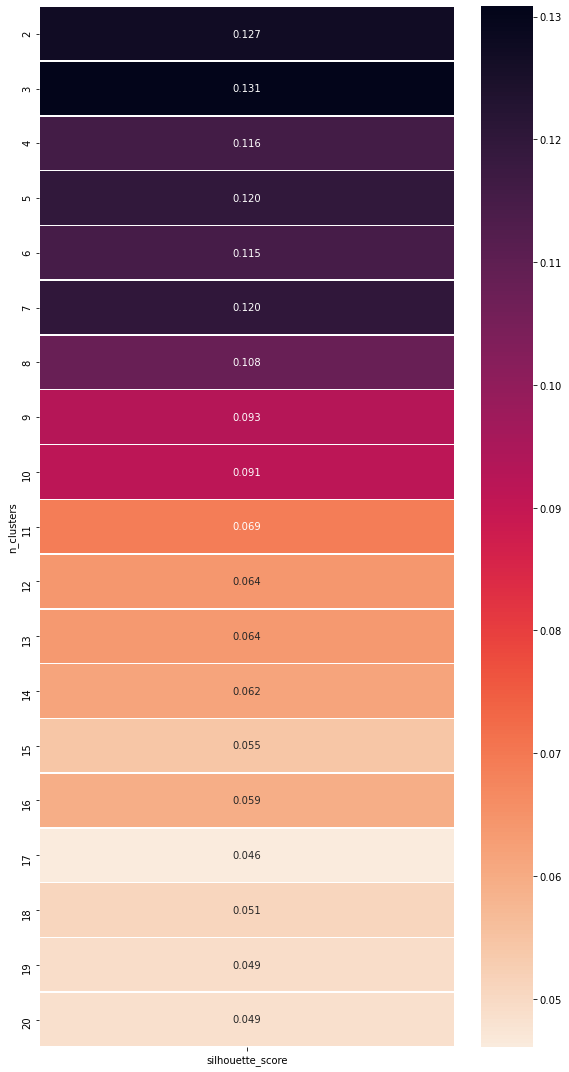

In [64]:
df_result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
df_pivot = pd.pivot_table(df_result, index="n_clusters", values="silhouette_score")

plt.figure(figsize=(8,15))
sns.heatmap(df_pivot, annot=True, linewidths=0.5, fmt=".3f", cmap=sns.cm.rocket_r)
plt.tight_layout()

Combining the figure of the elbow method and the silhouette score, the clusters number of 3, 5 and 7 are the candidates for the optimal number of clusters. However, after analyzing the visualizations from PCA, it shows we have 7 clusters. So let's continue the analysis with 7 as the number of clusters.

# Applying K-Means

In [55]:
def clustFreq(text, n_char, n_features):
      
    matrix_transformed = pcaFreq(text, n_char, n_features)
    
    #Initialize the class object
    kmeans = KMeans(n_clusters= 7)
    
    #predict the labels of clusters.
    label = kmeans.fit_predict(matrix_transformed)
    
    #Getting unique labels
    u_labels = np.unique(label)
    centroids = kmeans.cluster_centers_

    #plotting the results:
    plt.figure(figsize=(10,7))
    for i in u_labels:
        plt.scatter(matrix_transformed[label == i , 0] , matrix_transformed[label == i , 1] , label = "cluster {}".format(i+1))

    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

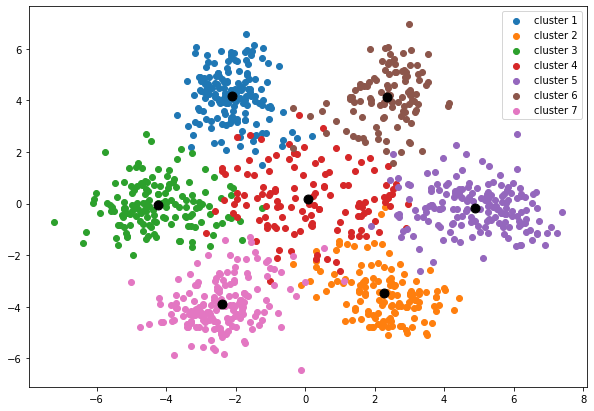

In [56]:
clustFreq(text, 3, 300)

# Conclusion

This project helps us to use the **PCA** and **K-Means** to anlayze the genomic sequence of a bacteria (Caulobacter Crescentus). By using the visualization power, we have seen that the structure of the bacteria genome is encoded by **non-overlapping triplets**.
Thereafter, We applied **K-Means** to cluster the unstructured data. By using the elbow technique and calculating the silhouette scores, we determined the optimal number of clusters which is 7. The **K-Means** algorithm has been applied and we can see clearly the 7 clusters that represent:
- **cluster 1**: forward direction starting with the first letter
- **cluster 2**: forward direction starting on the second letter
- **cluster 3**: forward direction starting on the third letter
- **cluster 4**: backward direction starting on the first letter
- **cluster 5**: backward direction starting on the second letter
- **cluster 6**: backward direction starting on the third letter
- **cluster 7**: Non-coding regions.

Based on this unsupervised classification we have confirm that the DNA is composed of 3 letters each. These three letters are known as **Codons**.